# Code for classifying emergency and non-emergency vehicle.

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/10.jpg')


In [5]:
img

array([[[177, 179, 194],
        [181, 183, 198],
        [182, 184, 199],
        ..., 
        [ 98,  68,  57],
        [118, 109, 110],
        [ 77,  81,  92]],

       [[186, 188, 203],
        [184, 186, 201],
        [180, 182, 197],
        ..., 
        [105,  75,  64],
        [128, 119, 120],
        [ 82,  86,  97]],

       [[183, 185, 200],
        [175, 177, 192],
        [168, 170, 185],
        ..., 
        [112,  83,  69],
        [141, 132, 133],
        [ 85,  89, 100]],

       ..., 
       [[ 14,  15,  20],
        [ 11,  12,  17],
        [ 11,  12,  17],
        ..., 
        [ 46,  51,  45],
        [ 48,  53,  47],
        [ 51,  56,  50]],

       [[ 19,  18,  24],
        [ 14,  13,  19],
        [ 13,  12,  18],
        ..., 
        [ 44,  49,  43],
        [ 46,  51,  45],
        [ 50,  55,  49]],

       [[ 21,  20,  26],
        [ 16,  15,  21],
        [ 14,  13,  19],
        ..., 
        [ 45,  50,  44],
        [ 41,  46,  40],
        [ 43,  48,

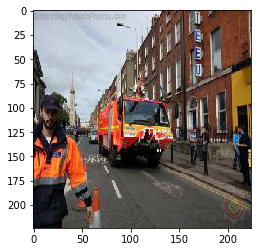

In [6]:
plt.imshow(img)

In [7]:
img.shape # To get the shape of image #Here 224-Height and width and 3rd diemension - contain 3 values of the intensity of pixel

(224, 224, 3)

In [8]:
img[0,0]

array([177, 179, 194], dtype=uint8)

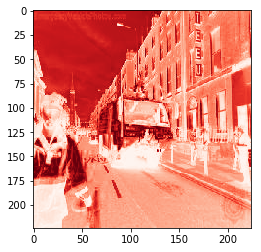

In [9]:
plt.imshow(img[:, :, 0], cmap='Reds')

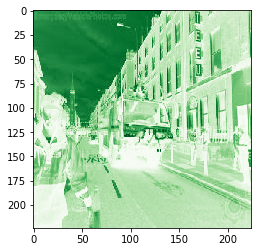

In [10]:
plt.imshow(img[:, :, 1], cmap='Greens')

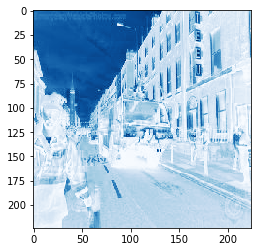

In [11]:
plt.imshow(img[:, :, 2], cmap='Blues')

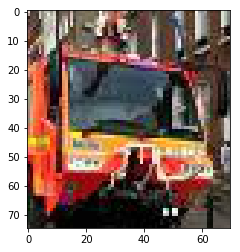

In [12]:
# selecting the patch of image 
patch = img [75:150, 80:150]
plt.imshow(patch)

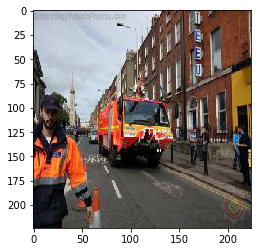

In [13]:
plt.imshow(img)


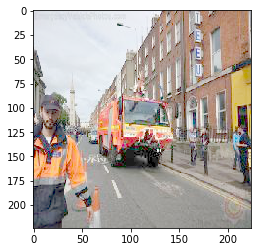

In [14]:
#To increase the brightness of image.

from skimage.exposure import adjust_gamma
plt.imshow(adjust_gamma(img, 0.4))

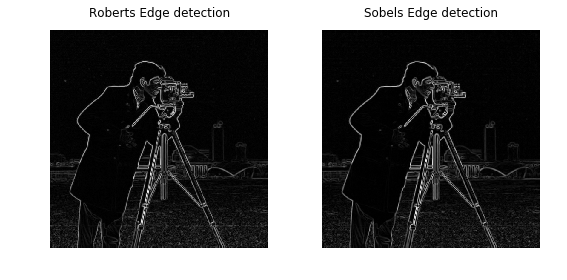

In [15]:
# detecting edges of image
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

patch = camera()
#patch=img
edge_roberts = roberts(patch)
edge_sobel = sobel(patch)

fig, ax = plt.subplots(ncols=2, sharex= True, sharey = True, figsize= (8,4))

ax[0].imshow(edge_roberts,cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge detection')


ax[1].imshow(edge_sobel,cmap=plt.cm.gray)
ax[1].set_title('Sobels Edge detection')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show()

In [16]:
# get random file names withouth changing the name every time

#load the all the filenames in a variable.
#Randomly select any file
#Read and plot the image

from glob import glob

images = glob('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/*.jpg')
images[1:10]

['U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\10.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\100.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1000.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1001.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1002.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1003.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1004.jpg',
 'U:/DataAnalysis/CV101-master/datasets/emergency_classification/images\\1005.jpg']

In [17]:
rng = np.random.RandomState()


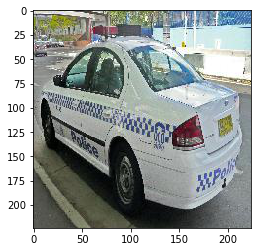

In [18]:
img_name = rng.choice(images)
img = plt.imread(img_name)
plt.imshow(img)

In [19]:
# Read the csv file which has classification.

import pandas as pd
df=pd.read_csv('U:/DataAnalysis/CV101-master/datasets/emergency_classification/emergency_classification.csv')
df.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [20]:
df['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

It is an emergency vehicle.


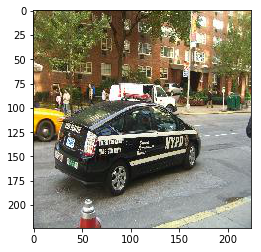

In [21]:
#We nned whole path of the file in image name.

#randomly select the file.
row_index = rng.choice(df.index)

#pick the name of the file
img_name = df.iloc[row_index]['image_names']

#read and plot the image.
img=plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/' + img_name)
plt.imshow(img)
#pick out the class of vehicle.
target = df.iloc[row_index]['emergency_or_not']

#print the class of vehicle
if target == 1:
    print("It is an emergency vehicle.")
else:
    print("It is a NON emergency vehicle")

In [22]:
#create an empty python list
X = []
#go through all the image location one by one
for img_name in df.image_names:
    img=plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/' + img_name)
    X.append(img)
#convert the python list into single numpy array
X = np.array(X)


In [23]:
X.shape

(2352, 224, 224, 3)

In [24]:
y = df.emergency_or_not.values
y.shape

(2352,)

In [25]:
#Convert to value for each category of data
from keras.utils import to_categorical
y = to_categorical(y)
y.shape

Using TensorFlow backend.


(2352, 2)

In [26]:
#split the data in train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=43)

In [27]:
#Use VGG16 a tried and tested model on imagenet dataset
from keras.applications.vgg16 import VGG16

In [28]:
base_model = VGG16(weights='imagenet')

In [29]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

C:\Users\wf6fcm\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(244, 244, 3)

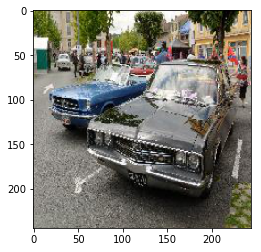

In [30]:
#Here the input is of dimension input_1 (InputLayer)         (None, 224, 224, 3)       0        
#in case we wan tot resize the inpit to above.
from skimage.transform import resize
new_img = resize(img,(244,244,3))
plt.imshow(new_img)
new_img.shape

In [31]:
#here the predictions (Dense)          (None, 1000)              4097000   Hence removing the top layer of prediction to suit ours

base_model = VGG16(weights='imagenet',input_shape=(224,224,3), include_top=False)


In [32]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [33]:
# Extract Features
#Reshape the data
#Rescale the features
#Create top model
#Train the model

In [34]:
base_model_pred = base_model.predict(x_train)
base_model_pred_test = base_model.predict(x_test)

In [40]:
base_model_pred.shape


(1646, 25088)

In [41]:
base_model_pred_test.shape

(706, 7, 7, 512)

In [42]:
base_model_pred = base_model_pred.reshape(1646,7*7*512)
base_model_pred_test = base_model_pred_test.reshape(706,7*7*512)

In [43]:
base_model_pred.max()

532.66223

In [44]:
max_val = base_model_pred.max()
base_model_pred = base_model_pred /max_val
base_model_pred_test = base_model_pred_test / max_val

In [45]:
base_model_pred.min(), base_model_pred.max()

(0.0, 1.0)

In [49]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [50]:
model = Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(units=1024, activation = 'relu'))
# Add another layer for classification, Will used sigmoid optimizer and activation as softmax as it is used for classification.
model.add(Dense(units = 2 , activation = 'softmax')) 


In [52]:
model.compile(optimizer = 'sgd' , metrics = ['accuracy'] , loss = 'categorical_crossentropy')



In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(base_model_pred,y_train ,epochs=17 , validation_data =(base_model_pred_test, y_test))


Train on 1646 samples, validate on 706 samples
Epoch 1/17
1646/1646 [==============================] - 11s - loss: 0.6634 - acc: 0.6640 - val_loss: 0.6259 - val_acc: 0.6714
Epoch 2/17
1646/1646 [==============================] - 10s - loss: 0.6126 - acc: 0.7017 - val_loss: 0.5766 - val_acc: 0.8116
Epoch 3/17
1646/1646 [==============================] - 10s - loss: 0.5616 - acc: 0.7934 - val_loss: 0.5271 - val_acc: 0.8725
Epoch 4/17
1646/1646 [==============================] - 10s - loss: 0.5108 - acc: 0.8639 - val_loss: 0.4774 - val_acc: 0.8867
Epoch 5/17
1646/1646 [==============================] - 10s - loss: 0.4629 - acc: 0.8797 - val_loss: 0.4333 - val_acc: 0.8966
Epoch 6/17
1646/1646 [==============================] - 10s - loss: 0.4205 - acc: 0.8900 - val_loss: 0.3960 - val_acc: 0.9065
Epoch 7/17
1646/1646 [==============================] - 10s - loss: 0.3841 - acc: 0.9016 - val_loss: 0.3649 - val_acc: 0.9093
Epoch 8/17
1646/1646 [==============================] - 10s - loss: 0.3

In [59]:
# Predict the values.
predictions  = model.predict_classes(base_model_pred_test)
predictions

672/706 [===========================>..] - ETA: 0s

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0,

In [60]:
# instead of value get the probability
prediction_probabilities = model.predict(base_model_pred_test)
prediction_probabilities

array([[ 0.16930383,  0.83069623],
       [ 0.24191204,  0.75808799],
       [ 0.82612669,  0.17387328],
       ..., 
       [ 0.84480041,  0.15519956],
       [ 0.85102826,  0.14897172],
       [ 0.07445046,  0.92554951]], dtype=float32)

In [63]:
#Display Image and its probability.
#pull all the images from validation set
_,valid_images,_,_ = train_test_split(df.image_names.values,y,test_size=0.3,random_state=43)


The vehicle being an emergency one has  Probablity : 96.%
Whereas as actual calss is  1


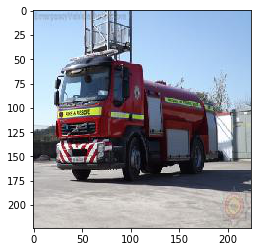

In [79]:
#get any random image
img_name = rng.choice(valid_images)

#get corrresponding probability and actual class.
prob = (prediction_probabilities[:,1]*100).astype(int)[np.where(valid_images == img_name)[0][0]]
actual_class = df.loc[df.image_names == img_name, 'emergency_or_not'].values[0]
#read the image 
img = plt.imread('U:/DataAnalysis/CV101-master/datasets/emergency_classification/images/'+ img_name)

#print the and probability and class
print("The vehicle being an emergency one has  Probablity : {}.%".format(prob))
print ("Whereas as actual calss is  {}".format(actual_class))
#plot tht image
plt.imshow(img)